Saba Alemayehu

In [ ]:

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline



In [ ]:
bank_df = pd.read_csv('/content/bank-full.csv', sep=';')

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Input variables:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#Renaming the response variable from "y" to "deposit"
bank_df.rename(columns = {'y':'deposit'}, inplace = True)

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank_df.shape

(45211, 17)

In [ ]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bank_df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
bank_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
bank_df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
bank_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
bank_df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
bank_df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

**Missing Values**

In [ ]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# **Exploratory Data Analysis**

Visualization of Numerical Variables

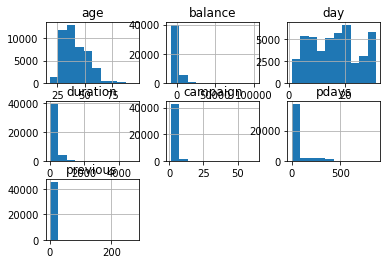

In [ ]:
hist = bank_df.hist()

## **Visualizing the relationship of categorical and the response variable**

**Mariatal status and deposit**

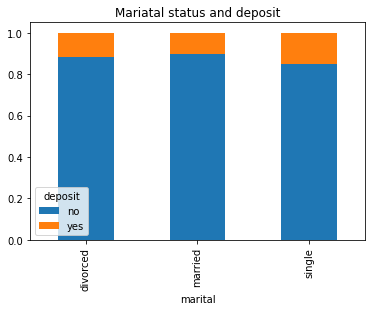

In [ ]:
crosstab_01=pd.crosstab(bank_df['marital'],bank_df['deposit'])
crosstab_norm1=crosstab_01.div(crosstab_01.sum(1),axis=0)
crosstab_norm1.plot(kind='bar',stacked=True,title="Mariatal status and deposit")

**Age and Deposit**

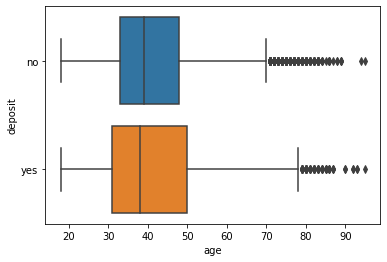

In [ ]:
sns.boxplot(x='age',y='deposit',data=bank_df)

**Educational Status and Deposit**

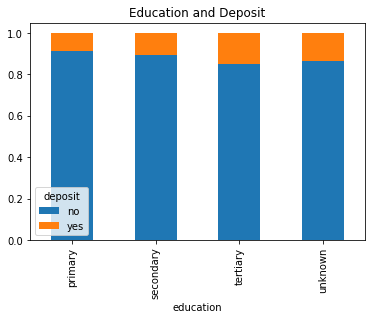

In [ ]:
crosstab_03=pd.crosstab(bank_df['education'],bank_df['deposit'])
crosstab_norm3=crosstab_03.div(crosstab_03.sum(1),axis=0)
crosstab_norm3.plot(kind='bar',stacked=True,title="Education and Deposit")

**Housing and Deposit**

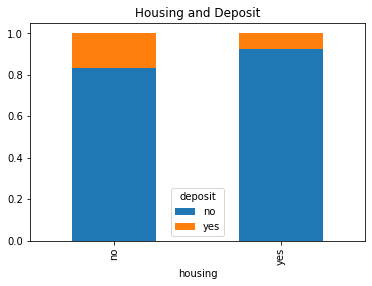

In [ ]:
crosstab_04=pd.crosstab(bank_df['housing'],bank_df['deposit'])
crosstab_norm4=crosstab_04.div(crosstab_04.sum(1),axis=0)
crosstab_norm4.plot(kind='bar',stacked=True,title="Housing and Deposit")

**Loan and Deposit**

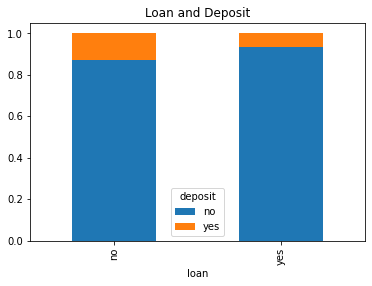

In [ ]:
crosstab_05=pd.crosstab(bank_df['loan'],bank_df['deposit'])
crosstab_norm5=crosstab_05.div(crosstab_05.sum(1),axis=0)
crosstab_norm5.plot(kind='bar',stacked=True,title="Loan and Deposit")

**Poutcome and Deposit**

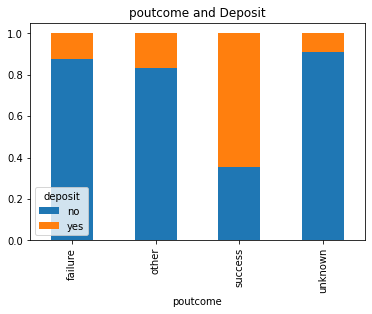

In [ ]:
crosstab_06=pd.crosstab(bank_df['poutcome'],bank_df['deposit'])
crosstab_norm6=crosstab_06.div(crosstab_06.sum(1),axis=0)
crosstab_norm6.plot(kind='bar',stacked=True,title="Poutcome and Deposit")

**Checking skewness**

In [ ]:
bank_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Visualizing Outliers**

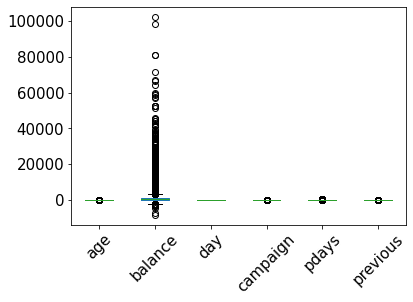

In [ ]:
# Visualizing Outliers
boxplot = bank_df.boxplot(grid=False, rot=45, fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


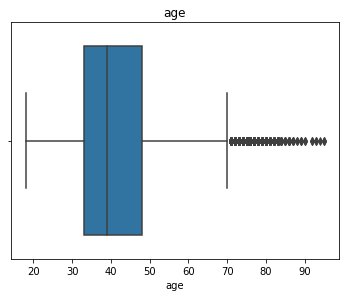

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


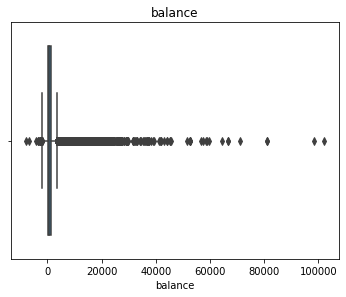

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


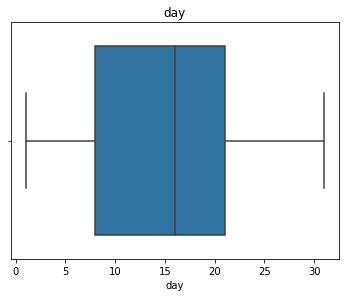

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


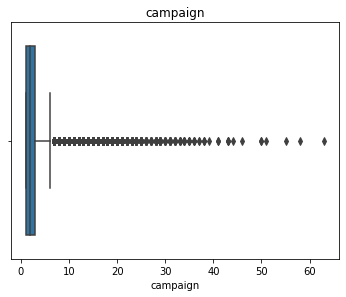

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


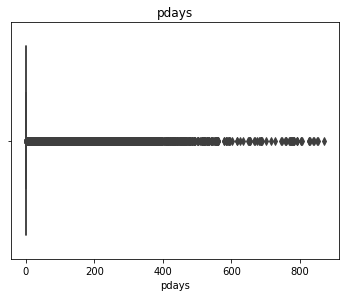

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


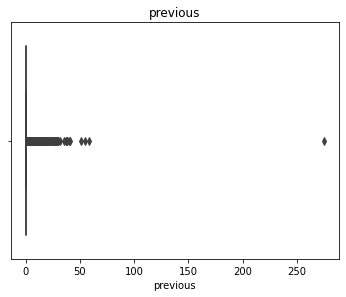

In [ ]:
# Visualizing each variables outlier
col=bank_df[['age','balance','day','campaign','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(bank_df[i])
  plt.title(i)
  plt.show()
  n=n+1

**Correlation**

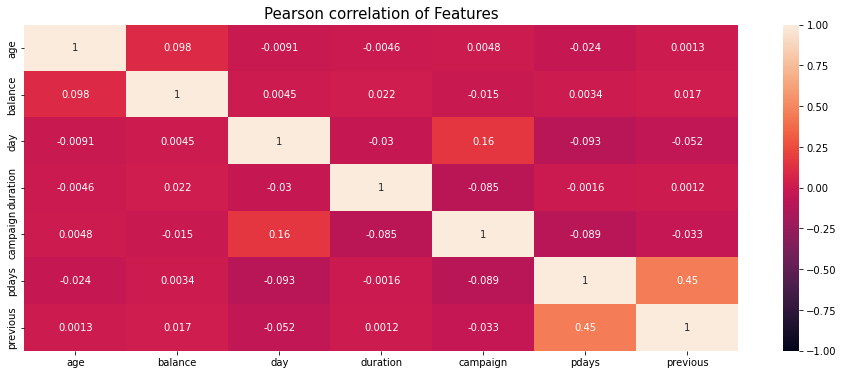

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(bank_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.title("Pearson correlation of Features", y=1.05, size=15);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


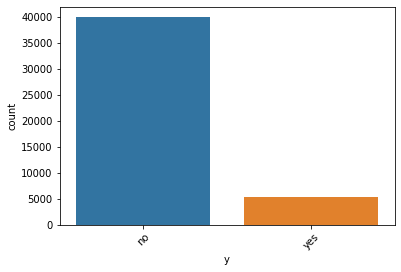

In [ ]:
for field in ['y']:
  fig,ax = plt.subplots()
  sns.countplot(bank_df[field])
  xticks=ax.get_yticklabels()
  ax.tick_params(axis='x',rotation=45)

In [ ]:
bank_df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

**Density plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


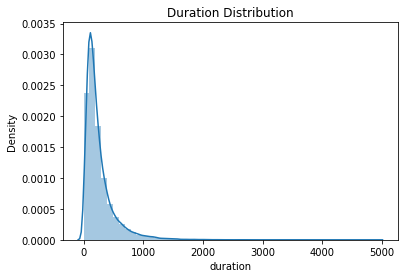

In [ ]:
sns.distplot(bank_df['duration'])
plt.title('Duration Distribution')
plt.show();

**Check Duplicates**

In [ ]:
duplicates=sum(bank_df.duplicated())
duplicates

16

# **Data Preprocessing**

**Dropping unrelated columns**

In [ ]:
# Dropp "duration" column
bank_df.drop(['duration','day','poutcome'], axis=1, inplace = True)
# contact,default,
#df.drop(['duration','contact','month','day_of_week'],axis=1,inplace=True)

In [ ]:
# Remove all duplicate rows
#bank_df = bank_df.drop_duplicates(keep=False)

**Removing Outliers**

In [ ]:
# removing outliers
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(bank_df[['age','balance','campaign','pdays','previous']]))
#print(z)
#bank_df=bank_df[(z<3).all(axis=1)]
#bank_df.shape

(41062, 16)

# **Separate dependent and independent variables**

**Scaling Numerical Data**

In [ ]:
#we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using StandardScaler()
#scaler = StandardScaler()
num_cols = ['age', 'balance','campaign', 'pdays', 'previous']
#bank_df[num_cols] = scaler.fit_transform(bank_df[num_cols])
bank_df[num_cols].head()

,age,balance,campaign,pdays,previous
0,58,2143,1,-1,0
1,44,29,1,-1,0
2,33,2,1,-1,0
3,47,1506,1,-1,0
4,33,1,1,-1,0


In [ ]:
bank_df.shape

(45211, 13)

**Ordinal encoding categories**

In [ ]:
ordinal_columns = bank_df[['education']]
enc = OrdinalEncoder()
enc.fit(ordinal_columns)
ordinal_df = pd.DataFrame(enc.transform(ordinal_columns),columns=list(ordinal_columns))

## Replace Ordinal Data with Encoded Data
bank_df2 = bank_df.drop(ordinal_columns ,axis=1)
nu_or_df = pd.concat([ordinal_df, bank_df2], axis=1)
nu_or_df.head()

,education,age,job,marital,default,balance,housing,loan,contact,month,campaign,pdays,previous,deposit
0,2.0,58,management,married,no,2143,yes,no,unknown,may,1,-1,0,no
1,1.0,44,technician,single,no,29,yes,no,unknown,may,1,-1,0,no
2,1.0,33,entrepreneur,married,no,2,yes,yes,unknown,may,1,-1,0,no
3,3.0,47,blue-collar,married,no,1506,yes,no,unknown,may,1,-1,0,no
4,3.0,33,unknown,single,no,1,no,no,unknown,may,1,-1,0,no


**Nominal Encoding Categories**

In [ ]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
nominal_columns = ['job','marital','default','housing','contact','loan','month']


# Encode Nominal Data
nominal_df=pd.DataFrame(encoder.fit_transform(nu_or_df[nominal_columns]))
nominal_df.columns = encoder.get_feature_names(nominal_columns)

## Replace Nominal Data with Encoded Data
bank_df3 = bank_df2.drop(nominal_columns ,axis=1)
all_combined = pd.concat([nominal_df, bank_df3], axis=1)
all_combined.head()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,age,balance,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,58,2143,1,-1,0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,44,29,1,-1,0,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,33,2,1,-1,0,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,47,1506,1,-1,0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,33,1,1,-1,0,no


In [ ]:
all_combined.shape

(45211, 27)

In [ ]:
all_combined['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

**Select features**

In [ ]:
X = all_combined.drop('deposit', axis=1)


y_data=all_combined['deposit']
le = preprocessing.LabelEncoder()
le.fit(y_data)
y=le.transform(y_data)
y.shape

X.shape, y_data.shape

((45211, 41), (45211,))

**Handling Unbalanced Data**

In [ ]:
# apply advanced under-sampling
from imblearn.under_sampling import NearMiss
nr = NearMiss(version=1)
x_rus, y_rus = nr.fit_resample(X, y)

**Spliting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.10,random_state=42)
print(X_train.shape), print(y_train.shape)
print(y_train.shape), print(y_test.shape)


(9520, 41)
(9520,)
(9520,)
(1058,)


(None, None)

In [ ]:
# import library
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
#x_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# In the first step we will split the data in training and remaining dataset
#X_train, X_rem, y_train, y_rem = train_test_split(x_rus,y_rus, train_size=0.5,random_state=42)

#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
#print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
#print(X_test.shape), print(y_test.shape)

In [ ]:
#X = df_cat.drop('status', axis=1)
#y=df_cat['status']
# apply advanced under-sampling
#from imblearn.under_sampling import NearMiss
#nr = NearMiss(version=1)
#x_rus, y_rus = nr.fit_resample(X, y)

# In the first step we will split the data in training and remaining dataset
##x_train, X_rem, y_train, y_rem = train_test_split(x_rus,y_rus, train_size=0.5,random_state=42)

#x_valid, x_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
#print(x_train.shape), print(y_train.shape)
##print(x_valid.shape), print(y_valid.shape)
#print(x_test.shape), print(y_test.shape)

In [ ]:
X_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,age,balance,day,campaign,pdays,previous
4374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.136095,0.716558,0.383734,0.399020,-0.411453,-0.251940
14202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.312428,0.747431,-0.577529,0.721811,-0.411453,-0.251940
42456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.653211,-0.350859,-0.817845,-0.569351,1.436189,1.050473
13498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.088167,-0.530514,-0.817845,-0.569351,-0.411453,-0.251940
42121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.324443,0.221605,-1.658950,-0.246560,2.325054,0.182198


In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=42)
#X_res, y_res = rus.fit_resample(X_train, y_train)
#print(X_res.shape), print(y_res.shape)


# **Model Development**

## **Base models**

* **Decision Tree**

In [ ]:
dtree = tree.DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

##prediction
pred1 = dtree.predict(X_test)
accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       557
           1       0.81      0.82      0.82       501

    accuracy                           0.83      1058
   macro avg       0.83      0.83      0.83      1058
weighted avg       0.83      0.83      0.83      1058



* **K-Nearest Neighbors**

In [ ]:
# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Predict Test Data
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       557
           1       0.90      0.77      0.83       501

    accuracy                           0.85      1058
   macro avg       0.86      0.85      0.85      1058
weighted avg       0.86      0.85      0.85      1058



* **Logistic Regression**

In [ ]:
Lg=LogisticRegression(penalty='l2', max_iter=100,random_state=42)
Lg.fit(X_train, y_train)
prediction=Lg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       557
           1       0.90      0.75      0.82       501

    accuracy                           0.84      1058
   macro avg       0.85      0.84      0.84      1058
weighted avg       0.85      0.84      0.84      1058



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


* **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

#Evaluation using testing
pred = svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       557
           1       0.94      0.70      0.80       501

    accuracy                           0.84      1058
   macro avg       0.86      0.83      0.83      1058
weighted avg       0.86      0.84      0.83      1058



* **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       557
           1       0.88      0.82      0.85       501

    accuracy                           0.86      1058
   macro avg       0.86      0.86      0.86      1058
weighted avg       0.86      0.86      0.86      1058



Neural Network

**Naive Bayes Classifier**

In [ ]:
 from sklearn.naive_bayes import GaussianNB
 clf = GaussianNB()
 clf.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       557
           1       0.88      0.82      0.85       501

    accuracy                           0.86      1058
   macro avg       0.86      0.86      0.86      1058
weighted avg       0.86      0.86      0.86      1058



* **Ensemble learning**

***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       557
           1       0.89      0.82      0.85       501

    accuracy                           0.87      1058
   macro avg       0.87      0.86      0.86      1058
weighted avg       0.87      0.87      0.87      1058



Bagged Decision Trees

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,X_train, y_train, cv=kfold)
print(results.mean())

0.8820378151260503


## **Decision Tree**

***Varying Tree Depth using Loop***

Text(0, 0.5, 'Performance')

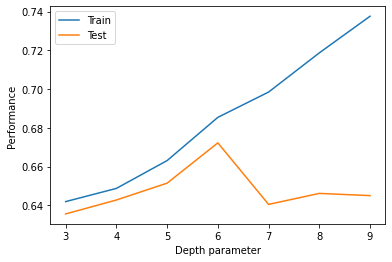

In [ ]:
train_errors = list()
test_errors = list()
for x in range(3,10):
  # Create multiple models here each based on the x variable above
  # Store the result of modes in train_erors and test_errors variables
  D_vary_trees = tree.DecisionTreeClassifier(random_state=42,max_depth=x)
  D_vary_trees = D_vary_trees.fit(X_train,y_train)
  scores = cross_val_score(D_vary_trees, X_train, y_train, cv=5,scoring='accuracy')
  train_errors.append(D_vary_trees.score(X_train, y_train))
  test_errors.append(D_vary_trees.score(X_test, y_test))

# Plot of test and training erros
plt.plot(range(3,10),train_errors, label='Train')
plt.plot(range(3,10),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

**Decision tree With Maxi_depth=4**

accuracy 0.67 
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1329
           1       0.72      0.55      0.62      1316

    accuracy                           0.67      2645
   macro avg       0.68      0.67      0.67      2645
weighted avg       0.68      0.67      0.67      2645

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1376
           1       0.69      0.53      0.60      1268

    accuracy                           0.66      2644
   macro avg       0.66      0.65      0.65      2644
weighted avg       0.66      0.66      0.65      2644



Text(0.5, 0, 'False Positive Rate')

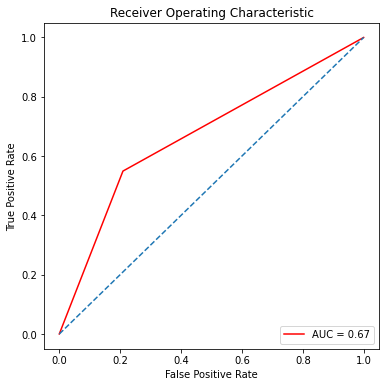

In [ ]:
short_tree=tree.DecisionTreeClassifier(max_depth=6)# Model initializing
short_tree=short_tree.fit(X_train,y_train)# Model fiting

y_pred = short_tree.predict(X_test)#prediction
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

#Evaluation using testing set
y_pred = short_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

#Evaluation using validating set
y_predv = short_tree.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))
#
#
class_roc=roc_auc_score(y_test, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
# confusion matrix for short tree
cm_short = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['yes', 'no']
test_results = pd.DataFrame(cm_short,index=labels,columns=labels)
display(test_results)
print(classification_report(y_test, y_pred))

#Evaluation using validating set
y_predv = short_tree.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))


,yes,no
yes,1052,277
no,592,724


              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1329
           1       0.72      0.55      0.62      1316

    accuracy                           0.67      2645
   macro avg       0.68      0.67      0.67      2645
weighted avg       0.68      0.67      0.67      2645

              precision    recall  f1-score   support

           0       0.55      0.12      0.20      1376
           1       0.48      0.89      0.63      1268

    accuracy                           0.49      2644
   macro avg       0.52      0.51      0.41      2644
weighted avg       0.52      0.49      0.40      2644



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


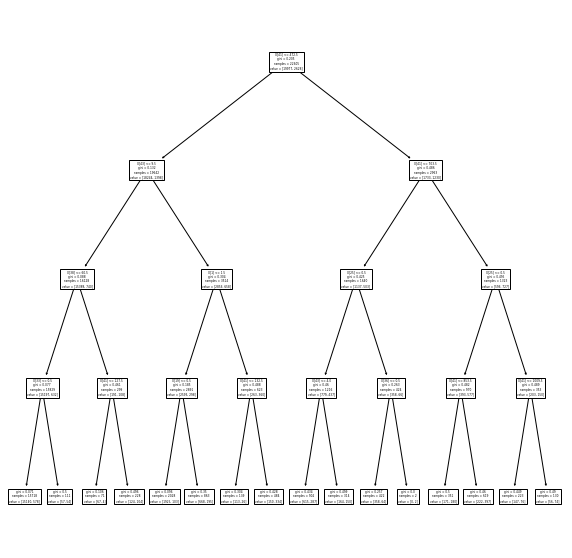

In [ ]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (10,10))
treeplot = tree.plot_tree(short_tree)

## **k-nearest neighbors algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#This function is supposed to create and test a KNN model
def k_neighbors(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues:
    clf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(xtrain, ytrain)
    clf_train_pred = clf.predict(xtrain)
    clf_test_pred = clf.predict(xtest)
    clfs.append(clf)
    knn_accuracy.append({'k values': i,
    'Training Accuracy':accuracy_score(clf_train_pred,ytrain),
    'Test Accuracy': accuracy_score(clf_test_pred,ytest)})
  return pd.DataFrame(knn_accuracy), clfs

In [ ]:
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,30,+2), 'euclidean')   #Define the range of 1 to 10 and the type as euclidean
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,0.999244,0.606805
1,3,0.795046,0.626087
2,5,0.751182,0.633270
3,7,0.729438,0.622684
4,9,0.714691,0.626843
5,11,0.709586,0.627977
6,13,0.695027,0.629868
7,15,0.687843,0.633270
8,17,0.678578,0.631002
9,19,0.675742,0.634405


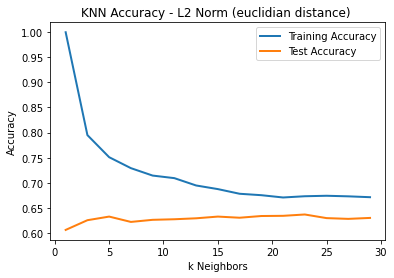

In [ ]:
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Training Accuracy'], '-',linewidth=2, label='Training Accuracy')
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')

# Repeat the same plot as above but this time for test accutracy
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - L2 Norm (euclidian distance) ')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

#Evaluation using testing set
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

#Evaluation using validating set
y_predv = classifier.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))



              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1329
           1       0.64      0.61      0.62      1316

    accuracy                           0.63      2645
   macro avg       0.63      0.63      0.63      2645
weighted avg       0.63      0.63      0.63      2645



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.80      0.05      0.09      1376
           1       0.49      0.99      0.65      1268

    accuracy                           0.50      2644
   macro avg       0.64      0.52      0.37      2644
weighted avg       0.65      0.50      0.36      2644



## **Logistic Regression**

In [ ]:
model=LogisticRegression(penalty='l2', max_iter=100,random_state=42)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_test, y_test, cv=5,scoring='accuracy')
prediction=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6412098298676748

[[799 530]
 [419 897]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1329
           1       0.63      0.68      0.65      1316

    accuracy                           0.64      2645
   macro avg       0.64      0.64      0.64      2645
weighted avg       0.64      0.64      0.64      2645

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1376
           1       0.60      0.66      0.63      1268

    accuracy                           0.63      2644
   macro avg       0.63      0.63      0.63      2644
weighted avg       0.63      0.63      0.63      2644



Text(0.5, 0, 'False Positive Rate')

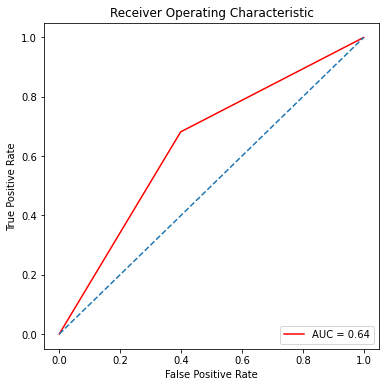

In [ ]:
#Evaluation using testing set
from sklearn.metrics import confusion_matrix
prediction=model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
print(classification_report(y_test, prediction))

#Evaluation using validating set
y_predv = model.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))

#ploting
logit_roc=roc_auc_score(y_test, prediction)
auc_roc=metrics.roc_auc_score(y_test,prediction)
auc_roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

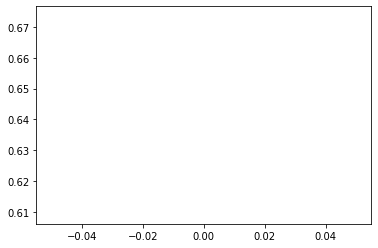

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(logit_roc)

## **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5,scoring='accuracy')

#Evaluation using testing
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

#using validation set
y_predv = clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1329
           1       0.66      0.61      0.63      1316

    accuracy                           0.65      2645
   macro avg       0.65      0.65      0.65      2645
weighted avg       0.65      0.65      0.65      2645



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1376
           1       0.48      1.00      0.65      1268

    accuracy                           0.48      2644
   macro avg       0.24      0.50      0.32      2644
weighted avg       0.23      0.48      0.31      2644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000,random_state=42)
rfc.fit(X_train, y_train)

scores = cross_val_score(rfc, X_train, y_train, cv=5,scoring='accuracy').mean()

#Evaluation using testing
predict = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)
print(classification_report(y_test, predict))

#Evaluation using validating set
y_predv = rfc.predict(X_valid)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_predv)
ac = accuracy_score(y_valid,y_predv)
print(classification_report(y_valid, y_predv))

[[890 439]
 [486 830]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1329
           1       0.65      0.63      0.64      1316

    accuracy                           0.65      2645
   macro avg       0.65      0.65      0.65      2645
weighted avg       0.65      0.65      0.65      2645



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.62      0.33      0.43      1376
           1       0.52      0.78      0.62      1268

    accuracy                           0.55      2644
   macro avg       0.57      0.55      0.53      2644
weighted avg       0.57      0.55      0.52      2644



## **Perceptron**

In [ ]:
labels = bank_df['deposit']
le = preprocessing.LabelEncoder()

le.fit(labels)
Yp = le.transform(labels)
Yp[Yp==0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, Yp, test_size=0.10, random_state=42)

In [ ]:
class PerceptronClassifier():
  def __init__(self, maxiter):
    # hyperparameter
    self.maxiter = maxiter
  def train_perceptron(self, X, y):
    # initialize weights, bias
    self.w = np.zeros(X.shape[1])
    self.b = 0
    for i in range(self.maxiter):
      for j in range(X.shape[0]):
        a = sum(self.w * X.iloc[j]) + self.b
        if y[j] * a <= 0:
          # update weights
          self.w += y[j] * X.iloc[j]
          self.b += y[j]
    # return trained weights, bias
    return self.w, self.b
  def predict_perceptron(self, X):
    a = [sum(self.w * x) + self.b for i, x in X.iterrows()]
    return np.sign(a).astype(int)

In [ ]:
perc = PerceptronClassifier(1)
perc_clf = perc.train_perceptron(X_train, y_train)
aud_labels=[-1,1]

from sklearn.metrics import confusion_matrix
perc_cm = confusion_matrix(y_test, perc.predict_perceptron(X_test))
pd.DataFrame(perc_cm, index=aud_labels, columns=aud_labels)

,-1,1
-1,3742,226
1,537,17


**Model Comparision Using Validation Test**

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

KNN

In [ ]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    # score validation set accuracy
    val_scores.append(knn.score(X_valid, y_valid))
# using max tells us the best score
print(f"best validation score: {np.max(val_scores):.3}")
# with argmax we can find the best value of n_neighbors used
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

best validation score: 0.503
best n_neighbors: 1


In [ ]:
# Now,
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_valid, y_valid):.3f}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


test-set score: 0.503


In [ ]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(KNeighborsClassifier(), X_valid, y_valid, return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_score,train_score
0,0.005055,0.124555,0.574669,0.723404
1,0.004342,0.053680,0.542533,0.723404
2,0.004551,0.060658,0.604915,0.717258
3,0.004483,0.119300,0.557656,0.719149
4,0.004503,0.101548,0.556818,0.726371


0.6446124763705104
[[851 478]
 [462 854]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1329
           1       0.64      0.65      0.65      1316

    accuracy                           0.64      2645
   macro avg       0.64      0.64      0.64      2645
weighted avg       0.64      0.64      0.64      2645



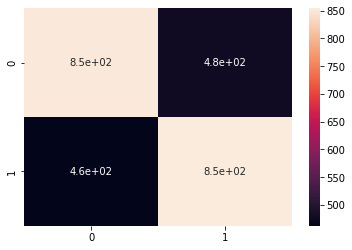

In [ ]:
#Logistic Regression
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
model4= GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=5, scoring="accuracy")
model4.fit(X_train, y_train)

#validate the model
prediction4=model4.predict(X_test)
print(accuracy_score(y_test, prediction4))

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction4)
print(cm)
sns.heatmap(cm,annot=True)

print(classification_report(y_test, prediction4))